# Travel Planner Based On Currency Conversion Risk -- Dashboard

### Import Library

In [ ]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import requests
from dotenv import load_dotenv

import pandas_datareader as pdr
from pandas_datareader import data as wb
import seaborn as sns

import numpy as np
%matplotlib inline

#Supress plots warning
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.max_open_warning': 0})


import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo
from yahoofinancials import YahooFinancials



#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

### Load Enviornments 

In [ ]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API keys 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")
alpha_vantage_api_key2 = os.getenv("ALPHA_VANTAGE_AP2")
alpha_vantage_api_key3 = os.getenv("ALPHA_VANTAGE_API3")

# Verify that Alpha Vantage keys was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key2)}")
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key3)}")

# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

## Variables

In [ ]:
name = "Singapore"
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

#-
name_2 = "Turkey"
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

#-
name_3 = "United Kingdom"
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
             

         f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")
#-
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"
#-
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key2')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key3')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3
#-
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])
#-
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])
#-
forex_stats = forex.describe()
forex_stats_2 = forex_2.describe()
forex_stats_3 = forex_3.describe()
#-
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])
#-
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig_2 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])

#-
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig_3 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])
#-
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
ticker_data_2 = pd.concat([forex_2], axis=1, keys=[f'{forex_pair_2}'])
ticker_data_3 = pd.concat([forex_3], axis=1, keys=[f'{forex_pair_3}'])
#-
yahoo_financials = YahooFinancials('DX-Y.NYB')
read_us_dollar = YahooFinancials('DX-Y.NYB')
us_dollar = read_us_dollar.get_historical_price_data('2010-04-23', '2022-04-23', 'daily')
us_dollar_price = us_dollar["DX-Y.NYB"]["prices"]
us_dollar_df = pd.DataFrame(us_dollar_price)
us_dollar_df.set_index(pd.to_datetime(us_dollar_df['formatted_date'], infer_datetime_format=True), inplace=True)
us_dollar_df.drop(columns=['date', 'open', 'high', 'low', 'volume', 'adjclose', 'formatted_date'], inplace=True)
us_dollar_df.columns=['US Dollar Close']
us_dollar_df.isnull().sum()
us_dollar_df = us_dollar_df.dropna()
us_dollar_daily_returns = us_dollar_df.pct_change().dropna()
us_dollar_daily_returns.columns=['US Dollar Daily Returns']
#-
forex_daily_returns = forex_close.pct_change().dropna()
forex_daily_returns.columns=[f'{forex_pair} Daily Returns']
forex_2_daily_returns = forex_2_close.pct_change().dropna()
forex_2_daily_returns.columns=[f'{forex_pair_2} Daily Returns']
forex_3_daily_returns = forex_3_close.pct_change().dropna()
forex_3_daily_returns.columns=[f'{forex_pair_3} Daily Returns']
#-
joined_forex_daily_returns = pd.concat([forex_daily_returns, forex_2_daily_returns, forex_3_daily_returns], axis='columns', join='inner')
joined_data = pd.concat([joined_forex_daily_returns, us_dollar_daily_returns], axis='columns', join='inner')
#-
cum_returns = (1+joined_data).cumprod()
#-
joined_data_daily_returns_std = joined_data.std()
isolated_dollar = joined_data['US Dollar Daily Returns'].std()
annualized_std = joined_data_daily_returns_std * np.sqrt(252)
joined_forex_21_day_std = joined_data.rolling(window = 21).std()
#-
correlation = joined_data.corr()
covariance = (joined_data[f'{forex_pair} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance = joined_data['US Dollar Daily Returns'].var()
beta = covariance / variance
covariance_2 = (joined_data[f'{forex_pair_2} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance_2 = joined_data['US Dollar Daily Returns'].var()
beta_2 = covariance_2 / variance_2
covariance_3 = (joined_data[f'{forex_pair_3} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance_3 = joined_data['US Dollar Daily Returns'].var()
beta_3 = covariance / variance
#-
combined_data_sharpe_ratios = (joined_data.mean() * 252) / (joined_data_daily_returns_std * np.sqrt(252))
#-
csvpath = Path("all_countries.csv")
country_list_df = pd.read_csv(csvpath)
capital_city = []
lat_long = []
currency = []
subregion = []
wiki = []
lat = []
long = []
for country in country_list_df['Country']:
    country_data = CountryInfo(country)
    capital_city.append(country_data.capital())
    lat.append(country_data.capital_latlng()[0])
    long.append(country_data.capital_latlng()[1])
    currency.append(country_data.currencies())
    subregion.append(country_data.subregion())
    wiki.append(country_data.wiki()) 
country_list_df['Capital City'] = capital_city
country_list_df['Latitude'] = lat
country_list_df['Longitude'] = long
country_list_df['Currency'] = currency
country_list_df['Sub-Region'] = subregion
country_list_df['wiki'] = wiki

#-
log_returns = np.log(joined_forex/joined_forex.shift(1)).dropna()
daily_std = log_returns.std()
annualized_std = daily_std * np.sqrt(252)
#-
volatility_3_months  = log_returns.rolling(window=21*3).std()*np.sqrt(21*3)
volatility_6_months = log_returns.rolling(window=21*6).std()*np.sqrt(21*6)
volatility_12_months = log_returns.rolling(window=21*12).std()*np.sqrt(21*12)

#-
# Rf = 0.01/252
# sortino_volatility_3_months = log_returns[log_returns<0].rolling(window=21*3, center=True, min_periods=10).std()*np.sqrt(21*3)
# sortino_volatility_6_months = log_returns[log_returns<0].rolling(window=21*6, center=True, min_periods=10).std()*np.sqrt(21*6)
# sortino_volatility_12_months = log_returns[log_returns<0].rolling(window=21*12, center=True, min_periods=10).std()*np.sqrt(21*12)

# #-
# sortino_ratio_3_months = (log_returns.rolling(window=21*3,).mean() - Rf)*21*3 / sortino_volatility_3_months
# sortino_ratio_6_months = (log_returns.rolling(window=21*6).mean() - Rf)*21*6 / sortino_volatility_6_months
# sortino_ratio_12_months = (log_returns.rolling(window=21*12).mean() - Rf)*21*12 / sortino_volatility_12_months

#-
def max_drawdown(returns):
    cumulative_returns = (returns+1).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns/peak)-1
    return drawdown.min()
returns = joined_forex.pct_change()
max_drawdowns = returns.apply(max_drawdown, axis=0)

#-
calmars = np.exp(log_returns.mean()*252)/abs(max_drawdowns)

#-
sims = 20

# Panel Visualizations

## Function

In [ ]:
def singapore_plot():
    singapore_line_plot = forex[['close']].plot()
    return singapore_line_plot
#


#     xlabel= "Dates", 
#     ylabel = f'{forex_pair}',
#     rot = 45,
#     title = f"Closing value of {forex_pair}",
#     color = "dodgerblue",
#     figsize = (20, 10)).legend(loc="lower right");
    

def turkey_plot():
    turkey_line_plot = forex_2[['close']].plot()
   
    return turkey_line_plot
#
def uk_plot():
    uk_line_plot = forex_3[['close']].plot()
    
    return uk_line_plot
#

def plot_singapore_candle_stick():
    # Volume
    singapore_candle_stick_plot = fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)

# Candlestick chart
    fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)

# Create a Bollinger Band

# Upper Bound
    fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


    fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='gainsboro'
    
    )
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)

    return singapore_candle_stick_plot
#-

def plot_turkey_candle_stick():

# Volume
    turkey_candle_stick_plot =fig_2.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig_2.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
    fig_2.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                    low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                    row=1, col=1)


# Create a Bollinger Band

# Upper Bound
    fig_2.add_trace(go.Scatter(x=forex_2.index, 
                             y=forex_2["MA20"] + (forex_2['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig_2.add_trace(go.Scatter(x=forex_2.index, 
                             y=forex_2["MA20"] - (forex_2['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.01),
                  row = 1, col = 1)


    fig_2.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='LightSteelBlue'
    
    )
# Remove range slider; (short time frame)
    fig_2.update(layout_xaxis_rangeslider_visible=False)

    return turkey_candle_stick_plot
#-


def plot_uk_candle_stick():
    
# Volume
    uk_candle_stick_plot = fig_3.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig_3.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
    fig_3.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                    low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                    row=1, col=1)


# Create a Bollinger Band

# Upper Bound
    fig_3.add_trace(go.Scatter(x=forex_3.index, 
                             y=forex_3["MA20"] + (forex_3['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig_3.add_trace(go.Scatter(x=forex_3.index, 
                             y=forex_3["MA20"] - (forex_3['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.01),
                  row = 1, col = 1)


    fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='LightSteelBlue'
    
    )
# Remove range slider; (short time frame)
    fig_3.update(layout_xaxis_rangeslider_visible=False)

    return uk_candle_stick_plot

#-
def singapore_currency_converter():
    singapore_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)

    return singapore_converter
#- 
def turkey_currency_converter():
    france_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair_2.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)
    return france_converter
#-
def uk_currency_converter():
    uk_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair_3.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)
    return uk_converter
#-
def plot_singapore_monte_carlo_3_months():
    singapore_monte_carlo_3_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()
    simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
    }
    df_simulated_returns = pd.DataFrame(simulated_returns_data)
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Over the Next 3 Months")
    initial_investment = 1000
    cumulative_pnl = initial_investment * df_simulated_returns
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Over the Next 3 Months")
    tbl = forex_montecarlo.summarize_cumulative_return()
    ci_lower = round(tbl[8]*1000,2)
    ci_upper = round(tbl[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")
    return 
    
#-
def plot_singapore_monte_carlo_6_months():
    singapore_monte_carlo_6_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()
    simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
    }
    df_simulated_returns = pd.DataFrame(simulated_returns_data)
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Over the Next 6 Months")
    initial_investment = 1000
    cumulative_pnl = initial_investment * df_simulated_returns
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Over the Next 6 Months")
    tbl = forex_montecarlo.summarize_cumulative_return()
    ci_lower = round(tbl[8]*1000,2)
    ci_upper = round(tbl[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")
    return 
    
#-
def plot_singapore_monte_carlo_12_months():
    singapore_monte_carlo_12_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()
    simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
    }
    df_simulated_returns = pd.DataFrame(simulated_returns_data)
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Over the Next 12 Months")
    initial_investment = 1000
    cumulative_pnl = initial_investment * df_simulated_returns
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Over the Next 12 Months")
    tbl = forex_montecarlo.summarize_cumulative_return()
    ci_lower = round(tbl[8]*1000,2)
    ci_upper = round(tbl[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")
    return 
#-
def plot_turkey_monte_carlo_3_months():
    turkey_monte_carlo_3_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation() 
    simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)
    df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} Over the Next 3 Months")
    initial_investment = 1000
    cumulative_pnl_2 = initial_investment * df_simulated_returns_2
    cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} Over the Next 3 Months")
    tbl_2 = forex_2_montecarlo.summarize_cumulative_return()
    ci_lower_2 = round(tbl_2[8]*1000,2)
    ci_upper_2 = round(tbl_2[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")
    return 
#-
def plot_turkey_monte_carlo_6_months():
    turkey_monte_carlo_6_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation() 
    simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)
    df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} Over the Next 6 Months")
    initial_investment = 1000
    cumulative_pnl_2 = initial_investment * df_simulated_returns_2
    cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} Over the Next 6 Months")
    tbl_2 = forex_2_montecarlo.summarize_cumulative_return()
    ci_lower_2 = round(tbl_2[8]*1000,2)
    ci_upper_2 = round(tbl_2[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")
    return 
#-   
def plot_turkey_monte_carlo_12_months():
    turkey_monte_carlo_12_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation() 
    simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)
    df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} Over the Next 12 Months")
    initial_investment = 1000
    cumulative_pnl_2 = initial_investment * df_simulated_returns_2
    cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} Over the Next 12 Months")
    tbl_2 = forex_2_montecarlo.summarize_cumulative_return()
    ci_lower_2 = round(tbl_2[8]*1000,2)
    ci_upper_2 = round(tbl_2[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")
    return 
#-   
def plot_uk_monte_carlo_3_months():
    uk_monte_carlo_3_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()
    simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)
    df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} Over the Next 3 Months")
    initial_investment = 1000
    cumulative_pnl_3 = initial_investment * df_simulated_returns_3
    cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} Over the Next 3 Months")
    tbl_3 = forex_3_montecarlo.summarize_cumulative_return()
    ci_lower_3 = round(tbl_3[8]*1000,2)
    ci_upper_3 = round(tbl_3[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")
    return 
#-

def plot_uk_monte_carlo_6_months():
    uk_monte_carlo_6_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()
    simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)
    df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} Over the Next 6 Months")
    initial_investment = 1000
    cumulative_pnl_3 = initial_investment * df_simulated_returns_3
    cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} Over the Next 6 Months")
    tbl_3 = forex_3_montecarlo.summarize_cumulative_return()
    ci_lower_3 = round(tbl_3[8]*1000,2)
    ci_upper_3 = round(tbl_3[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")
    return 
#-
def plot_uk_monte_carlo_12_months():
    uk_monte_carlo_12_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()
    simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)
    df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} Over the Next 12 Months")
    initial_investment = 1000
    cumulative_pnl_3 = initial_investment * df_simulated_returns_3
    cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} Over the Next 12 Months")
    tbl_3 = forex_3_montecarlo.summarize_cumulative_return()
    ci_lower_3 = round(tbl_3[8]*1000,2)
    ci_upper_3 = round(tbl_3[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")
    return 
#-
def plot_joined_data():
    joined_data_plot = joined_data.plot(figsize=(20,10))
    return joined_data_plot
#-

def plot_cumulative_returns():
    cumulative_returns = cum_returns.plot(figsize=(20,10))
    return cumulative_returns
#-
        
def plot_joined_data_box():
    joined_data_box_plot = joined_data.plot.box(figsize=(20,10))
    return joined_data_box_plot
        
#-

def plot_joined_forex_21_day_std():
    joined_forex_21_day_std_plot = joined_forex_21_day_std.plot(figsize=(20, 10))
    return joined_forex_21_day_std_plot
        
#-
def plot_heatmap():
    heatmap = sns.heatmap(correlation, vmin=-1, vmax=1)
    return heatmap

#-
def plot_beta():
    beta_plot = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot

#- 
def plot_beta_2():
    beta_plot_2 = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_2} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return plot_beta_2

#- 
def plot_beta_3():
    beta_plot_3 = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_3} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot_3

#- 


def plot_combined_data_sharpe_ratio():
    combined_data_sharpe_ratio_plot = combined_data_sharpe_ratios.plot(kind="bar", title= "Combined Data Sharpe Ratios")
    return combined_data_sharpe_ratio_plot
     
#-
def plot_volatility_3_months():
    plot_volatility_3 = volatility_3_months.plot()
    return plot_volatility_3
#-
def plot_volatility_6_months():
    plot_volatility_6 = volatility_6_months.plot()
    return plot_volatility_6
#-
def plot_volatility_12_months():
    plot_volatility_12 = volatility_12_months.plot()
    return plot_volatility_12

#-
def plot_sortino_volatility_3_months():
    sortino_volatility_3_months = sortino_volatility_3_months.plot()
    return sortino_volatility_3_months
#-
def plot_sortino_volatility_6_months():
    sortino_volatility_6_months = sortino_volatility_6_months.plot()
    return sortino_volatility_6_months
#-
def plot_sortino_volatility_12_months():
    sortino_volatility_12_months = sortino_volatility_12_months.plot()
    return sortino_volatility_12_months

#-
def plot_sortino_ratio_3_months():
    sortino_ratio_3_months = sortino_ratio_3_months.plot()
    return sortino_ratio_3_months
#-
def plot_sortino_ratio_6_months():
    sortino_ratio_6_months = sortino_ratio_6_months.plot()
    return sortino_ratio_6_months
#-
def plot_sortino_ratio_12_months():
    sortino_ratio_12_months = sortino_ratio_12_months.plot()
    return sortino_ratio_12_months

#-
def plot_calmers():
    calmars_plot = calmars.plot.bar()
    return calmers_plot

#-
def plot_world_map():
    world_map = px.scatter_mapbox(
    country_list_df,
    lat='Latitude',
    lon='Longitude', 
    zoom=1.2,
    )
    return world_map
             

In [ ]:
# example -- delete when done




# title = pn.pane.Markdown('''
#         # Travel Planner Based on Currency Conversion Risk,
#         ''',
#        width = 400)

# welcome = pn.pane.Markdown(

#     '''
#     ### This dashboard, created by Richie Garafola, Scott Phillips and Mark Staten presents a visual analysis of travel planning to any desired country in the world based on currency conversion risk. 
#     ### You can navigate through the tabs above to explore more details about the evolution of using a pre determined budget and analyzing the risk of converting currency.
#         ''',
#     width = 400)
# pn.Column(('plot volatility 3 months', plot_volatility_3_months()))
          
# tabs = pn.Tabs(
#     ("plot volatility 3 months", pn.Column(plot_volatility_3_months())))
          
# ### Currency Conversion
# dashboard = pn.Column(pn.Row(title),tabs)

## Panel Dashboard

Conversion Amount:  1379.7599924407066
Conversion Amount:  14821.600680336389
Conversion Amount:  795.7573466880846
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
There is a 95% chance that your travel budget of $1000 will end within the range of  $966.57 and $1045.49, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
There is a 95% chance that your travel budget of $1000 will end within the range of  $803.09 and $1104.4, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
There is a 95% chance that your travel budget of $1000 will end within the range of  $804.11 and $1151.91, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
There is a 95% chance that your travel budget of $1000 will end within the range of  $812.22 and $1084.68, by th

UnboundLocalError: local variable 'sortino_volatility_3_months' referenced before assignment

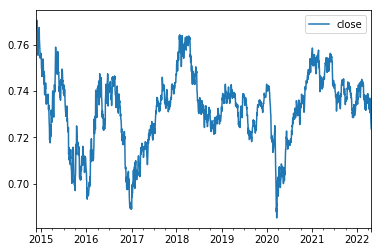

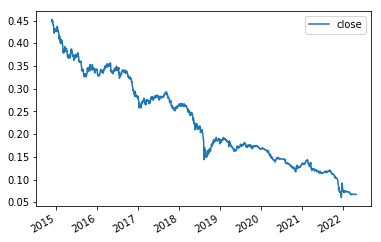

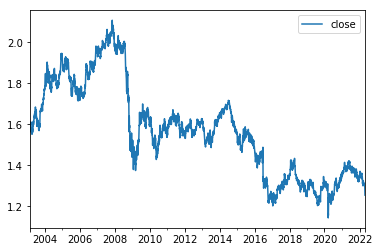

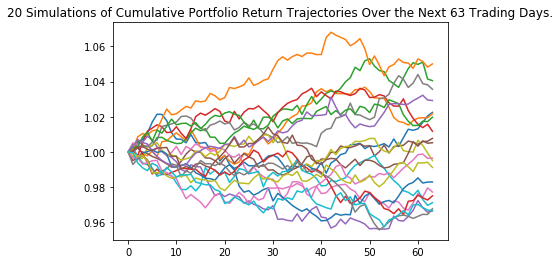

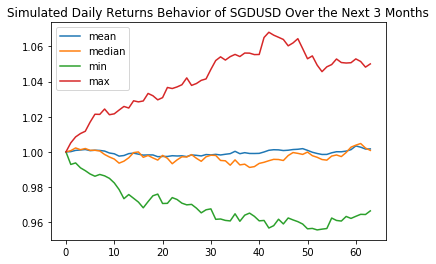

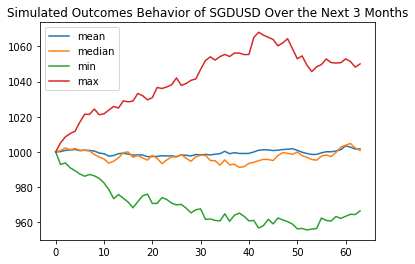

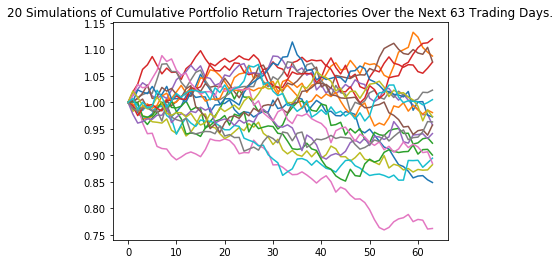

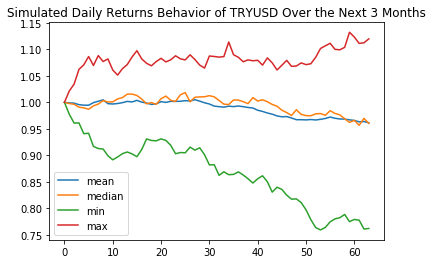

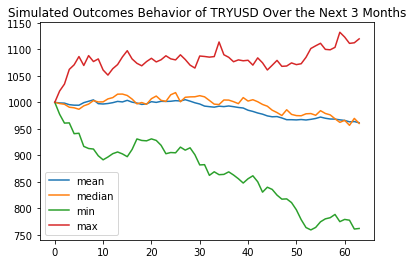

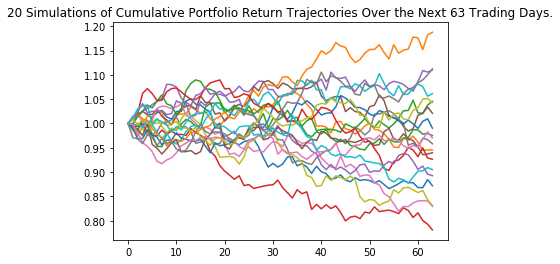

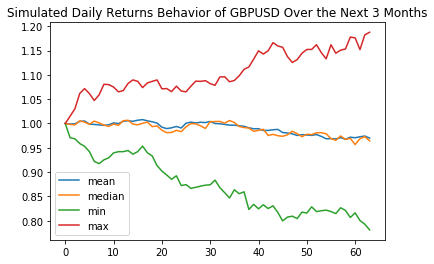

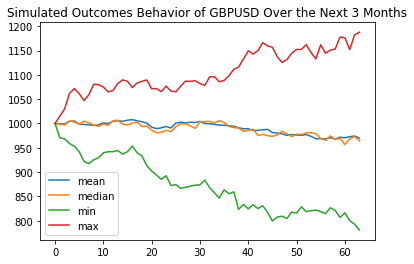

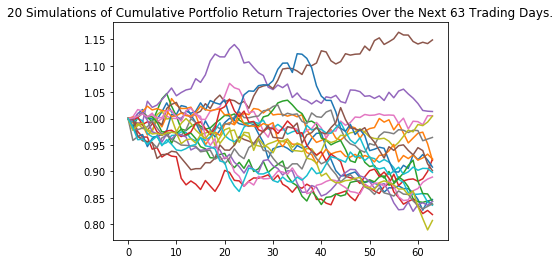

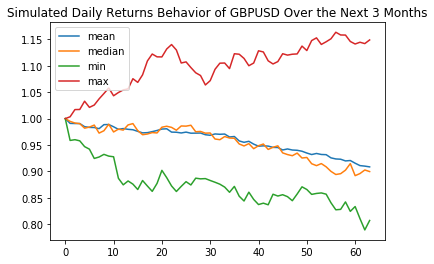

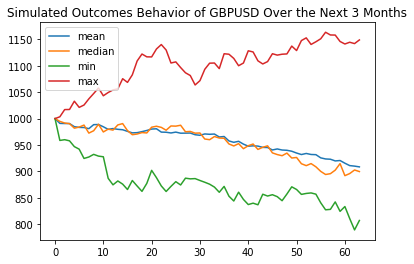

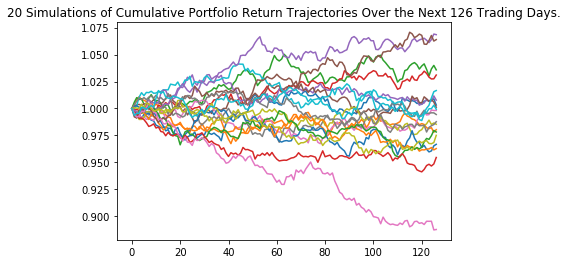

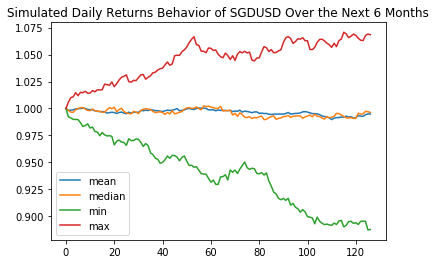

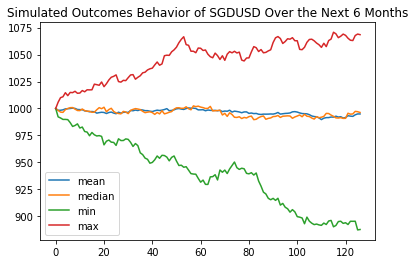

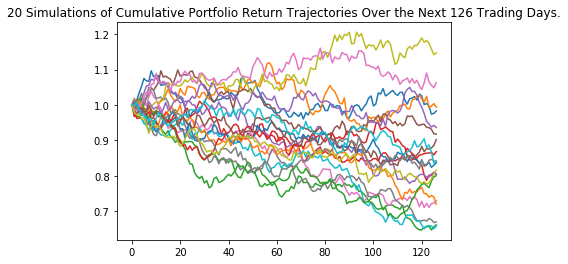

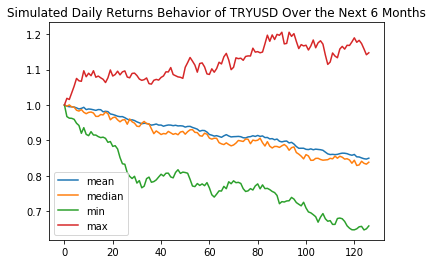

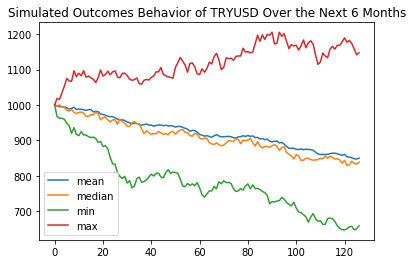

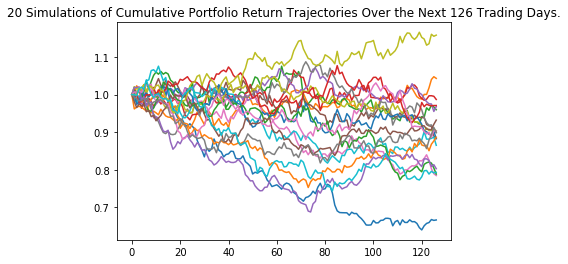

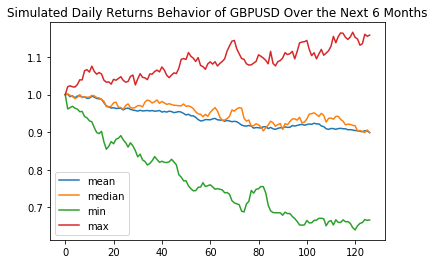

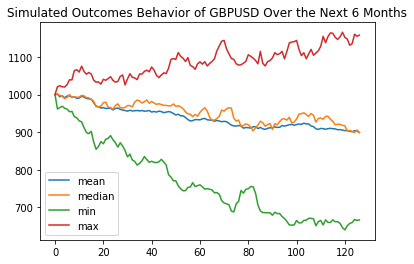

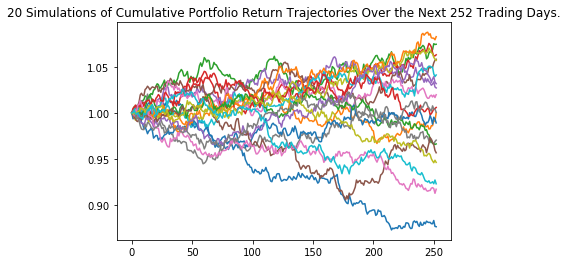

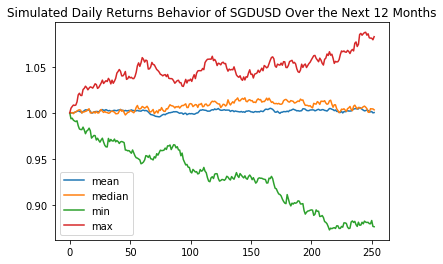

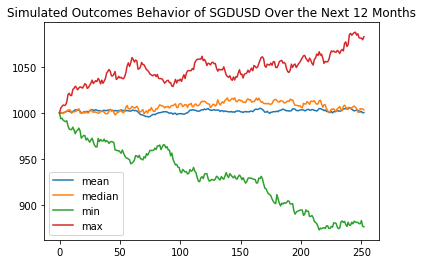

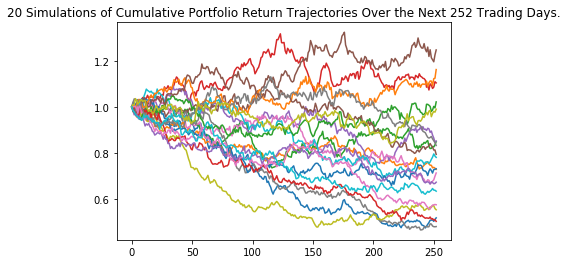

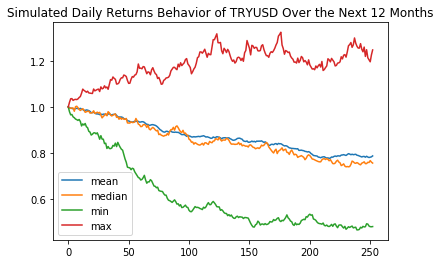

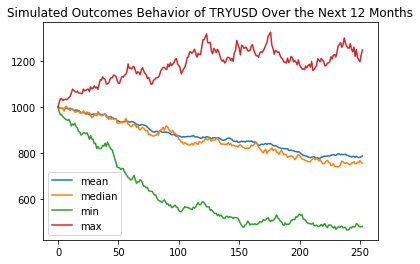

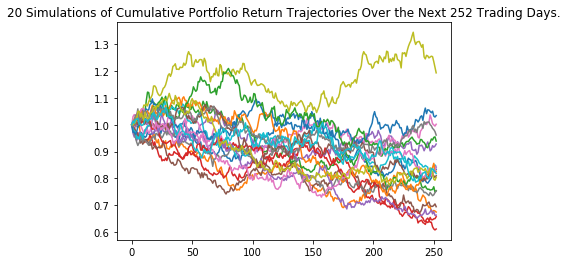

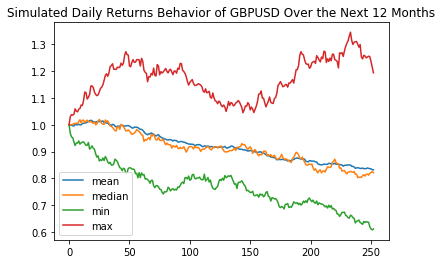

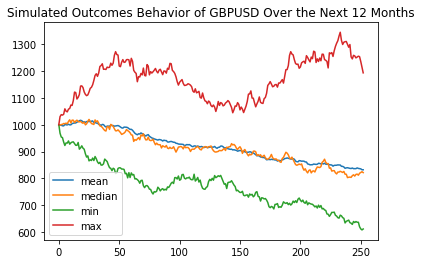

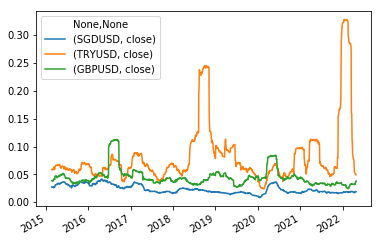

In [17]:
# Create a Title for the Dashboard
title = pn.pane.Markdown("""
        '# Travel Planner Based on Currency Conversion Risk')
         """,
        width = 400)

welcome = pn.pane.Markdown(
    '''
    ### This dashboard, created by Richie Garafola, Scott Phillips and Mark Staten presents a visual analysis of travel planning to any desired country in the world based on currency conversion risk. 
    ### You can navigate through the tabs above to explore more details about the evolution of using a pre determined budget and analyzing the risk of converting currency.
        ''',
    width = 400)

Singapore_Data = pn.Column('Singapore Analysis',singapore_currency_converter(),singapore_plot(),plot_singapore_candle_stick())
Turkey_Data = pn.Column('Turkey Analysis', turkey_currency_converter(),turkey_plot(),plot_turkey_candle_stick())                                 
UK_Data = pn.Column('United Kingdom Analysis',uk_currency_converter(),uk_plot(),plot_uk_candle_stick())
monte_carlo_3_months = pn.Row('Monte Carlo 3 Months', plot_singapore_monte_carlo_3_months(),plot_uk_monte_carlo_3_months,plot_turkey_monte_carlo_3_months(),plot_uk_monte_carlo_3_months())
monte_carlo_6_months = pn.Row('Monte Carlo 6 Months', plot_singapore_monte_carlo_6_months(),plot_turkey_monte_carlo_6_months(),plot_uk_monte_carlo_6_months())
monte_carlo_12_months = pn.Row('Monte Carlo 12 Months', plot_singapore_monte_carlo_12_months(),plot_turkey_monte_carlo_12_months(),plot_uk_monte_carlo_12_months())

# beta = pn.Row('Beta', plot_beta(), plot_beta_2(), plot_beta_3())

risk_3_months = pn.Row('3 Months Risk', plot_volatility_3_months(), plot_sortino_volatility_3_months(), plot_sortino_ratio_3_months())
risk_6_months = pn.Row('6 Months Risk',plot_volatility_6_months(), plot_sortino_volatility_6_months(), plot_sortino_ratio_6_months())
risk_12_months = pn.Row('12 Months Risk',plot_volatility_12_months(), plot_sortino_volatility_12_months(), plot_sortino_ratio_12_months())
risk = pn.Row('Risk', plot_combined_data_sharpe_ratio(),plot_calmers())               

In [18]:
tabs = pn.Tabs(
#    ("welcome", world_map()),
    ("Singapore Analysis", Singapore_Data),
    ("Turkey Analysis", Turkey_Data),
    ("United Kingdom Analysis", UK_Data),
    ("Monte Carlo Simulation 3 months", monte_carlo_3_months),
    ("Monte Carlo Simulation 6 months", monte_carlo_6_months),
    ("Monte Carlo Simulation 12 months", monte_carlo_12_months),
#    ("Beta", beta),
#    ("3 Month Risk Analysis", risk_3_months),
#    ("6 Month Risk Analysis", risk_6_months),
#    ("12 Month Risk Analysis", risk_12_months),
#    ("Risk Analysis", risk)
    
)   
tabs

### Currency Conversion
dashboard = pn.Column(pn.Row(title),(tabs))

In [19]:
# Serve the dashboard
dashboard.servable()

Column
    [0] Row
        [0] Markdown(str, width=400)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Str(tuple)
            [2] Str(AxesSubplot)
            [3] Plotly(Figure)
        [1] Column
            [0] Markdown(str)
            [1] Str(tuple)
            [2] Str(AxesSubplot)
            [3] Plotly(Figure)
        [2] Column
            [0] Markdown(str)
            [1] Str(tuple)
            [2] Str(AxesSubplot)
            [3] Plotly(Figure)
        [3] Row
            [0] Markdown(str)
            [1] Str(None)
            [2] Column
                [0] Column()
                [1] Row
                    [0] Str(None, name='interactive01659')
            [3] Str(None)
            [4] Str(None)
        [4] Row
            [0] Markdown(str)
            [1] Str(None)
            [2] Str(None)
            [3] Str(None)
        [5] Row
            [0] Markdown(str)
            [1] Str(None)
            [2] Str(None)
            [3] Str(None)

# Debugging

In [ ]:
singapore_plot()

In [ ]:
turkey_plot()

In [ ]:
uk_plot()

In [ ]:
plot_singapore_candle_stick()

In [ ]:
plot_turkey_candle_stick()

In [ ]:
plot_uk_candle_stick()

In [ ]:
singapore_currency_converter()

In [ ]:
turkey_currency_converter()

In [ ]:
uk_currency_converter()

In [ ]:
plot_singapore_monte_carlo_3_months()

In [ ]:
plot_singapore_monte_carlo_6_months()

In [ ]:
plot_singapore_monte_carlo_12_months()

In [ ]:
plot_turkey_monte_carlo_3_months()

In [ ]:
plot_turkey_monte_carlo_6_months()

In [ ]:
plot_turkey_monte_carlo_12_months()

In [ ]:
plot_uk_monte_carlo_3_months()

In [ ]:
plot_uk_monte_carlo_6_months()

In [ ]:
plot_uk_monte_carlo_12_months()

In [ ]:
plot_joined_data()

In [ ]:
plot_cumulative_returns()

In [ ]:
plot_joined_data_box()

In [ ]:
plot_joined_forex_21_day_std()

In [ ]:
plot_heatmap()

In [ ]:
plot_beta()

In [ ]:
plot_beta_2()

In [ ]:
plot_beta_3()

In [ ]:
plot_combined_data_sharpe_ratio()

In [ ]:
plot_volatility_3_months()

In [ ]:
plot_volatility_6_months()

In [ ]:
plot_volatility_12_months()

In [ ]:
plot_sortino_volatility_3_months()

In [ ]:
plot_sortino_volatility_6_months()

In [ ]:
plot_sortino_volatility_12_months()

In [ ]:
plot_sortino_ratio_3_months()

In [ ]:
plot_sortino_ratio_6_months()

In [ ]:
plot_sortino_ratio_12_months()

In [ ]:
plot_calmers()

In [ ]:
world_map() # <- not plotting yet